In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

## Object

In [2]:
obj="oj287"

# Radio

In [3]:
#freq="radio"
#labelleft= "Flux Density (Jy)"
#instr = " OVRO/RADIO 40m "
#data = pd.read_table("data/"+obj+"_"+freq+"_average.dat")

# Óptico

In [4]:
#freq="optical"
#labelleft= "Magnitude"
#instr = " AAVSO "
#data = pd.read_table("data/"+obj+"_"+freq+"_average.dat")

# X-rays

In [3]:
freq="x-rays"
labelleft= "Count Rate (0.3-10 keV)(c/s)"
instr = " SWIFT "
#data = pd.read_table("../x-rays/curve.dat", sep="\s+", comment='#', usecols=(0,3,4),nrows=160329)
data = pd.read_table("data/"+obj+"_"+freq+"_final.dat", usecols=(0,1,2))
#data = pd.read_table("data/"+obj+"_"+freq+"_average.dat", usecols=(0,1,2))
pd.set_option('display.max_rows', None)
data.dtypes

2008-11-11     object
 0.3214188     object
0.1481528     float64
dtype: object

# Gamma

In [41]:
#luz="gamma"
#path = "../"+luz+"/"
#labelleft= "photons/cm^2/s"
#instr = " FERMI "
#data = pd.read_table("../gamma/mrk421.dat", sep="\s+", comment='#')

## Headeres

In [4]:
data.columns = ['date', 'Flux', 'Err']
#ts = data["Flux"]
#date = data["date"]

In [5]:
data.sort_values(["date"], axis=0, ascending=True, inplace=True)
data["Flux"] = pd.to_numeric(data["Flux"], downcast="float",errors='coerce')

#data = data.fillna(value=0)
data.dtypes

date     object
Flux    float32
Err     float64
dtype: object

In [6]:
ts = data["Flux"]
date = data["date"]

In [7]:
data.shape

(4209, 3)

In [8]:
ts_EWM = ts.ewm(adjust=False,alpha=0.1).mean()
ts_EWM = ts_EWM.fillna(value=0)
ts_EWM.shape

(4209,)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal

#data.index = data.date
#data.reset_index(inplace=True)

rcParams['figure.figsize'] = 25, 70

plt.tick_params(axis='both', which='major', labelsize=24)

decomposition = seasonal_decompose(ts_EWM, freq=4)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(711)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.title('Light Curve Decomposition'+instr+obj, fontsize=24)
plt.scatter(data['date'], data['Flux'], label='Light Curve',marker='.')
plt.legend(loc='best', fontsize=24)
plt.ylabel(labelleft, fontsize=24)
plt.ylim(0,2)
plt.xticks(np.arange(0, 4208, step=701), fontsize=24)
plt.grid()

plt.subplot(712)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.ylabel('Trend', fontsize=24)
plt.scatter(data['date'], trend, label='Trend', marker=".")
plt.legend(loc='best', fontsize=24)
plt.ylim(0,2)
plt.xticks(np.arange(0, 4208, step=701), fontsize=24)
plt.grid()

plt.subplot(713)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.ylabel('Residual', fontsize=24)
plt.plot(data['date'],residual, label='Residual')
plt.legend(loc='best', fontsize=24)
plt.ylim(0,2)
plt.xlabel('Time', fontsize=24)
plt.xticks(np.arange(0, 4208, step=701), fontsize=24)
plt.grid()

plt.subplot(714)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.ylabel(labelleft, fontsize=24)
plt.title('Light Curve Decomposition'+instr+obj, fontsize=24)
plt.scatter(data['date'], data['Flux'], label='Light Curve',marker='.')
plt.plot(data['date'], trend, label='Trend', color="red")
plt.legend(loc='best', fontsize=24)
plt.ylim(0,2)
plt.xticks(np.arange(0, 4208, step=701), fontsize=24)
plt.grid()

plt.subplot(715)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.ylabel('Trend', fontsize=24)
plt.plot(data['date'], trend, label='Trend', color="blue")
plt.legend(loc='best', fontsize=24)
plt.ylim(0,2)
plt.xticks(np.arange(0, 4208, step=701), fontsize=24)
plt.grid()

plt.subplot(716)
widths = np.arange(1,50)
cwtmatr = signal.cwt(ts_EWM, signal.ricker, widths)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.title('Continuous Wavelet Transform'+instr+obj, fontsize=24)
plt.imshow(cwtmatr, aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar(pad=0.01)
plt.ylabel('Frequency', fontsize=24)

plt.subplot(717)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.title('Spectrogram'+instr+obj, fontsize=24)
f, t, Sxx = signal.spectrogram(ts_EWM)
plt.pcolormesh(t, f, Sxx)
plt.axis([t.min(), t.max(), f.min(),f.max()])
#plt.axis([150, 350, 0, 0.05])
plt.colorbar(pad=0.01)
plt.ylabel('Frequency', fontsize=24)
plt.xlabel('Time', fontsize=24)


plt.tight_layout()
#plt.savefig("images/"+obj+"_"+freq+"_seasonal.png", format="png", dpi=300)

NameError: name 'trend' is not defined

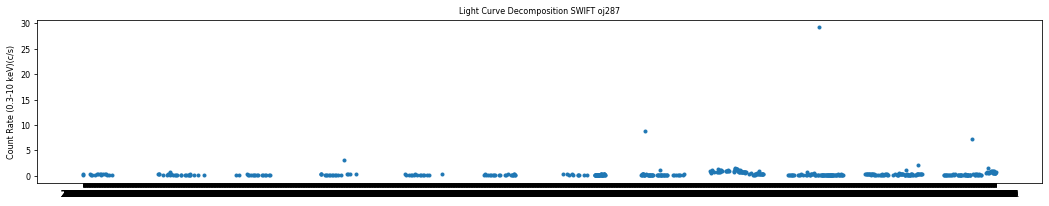

In [12]:
rcParams['figure.figsize'] = 18, 3
plt.subplot(111)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.ylabel(labelleft, fontsize=8)
plt.title('Light Curve Decomposition'+instr+obj, fontsize=8)
plt.scatter(data['date'], data['Flux'], label='Light Curve',marker='.')
plt.plot(data['date'], trend, label='Trend', color="red")
plt.legend(loc='best', fontsize=8)
plt.ylim(0,2)
plt.xticks(np.arange(0, 4208, step=701), fontsize=8)
plt.grid()
#plt.savefig("images/"+obj+"_"+freq+"_sound-lc-js.png", format="png", dpi=300)

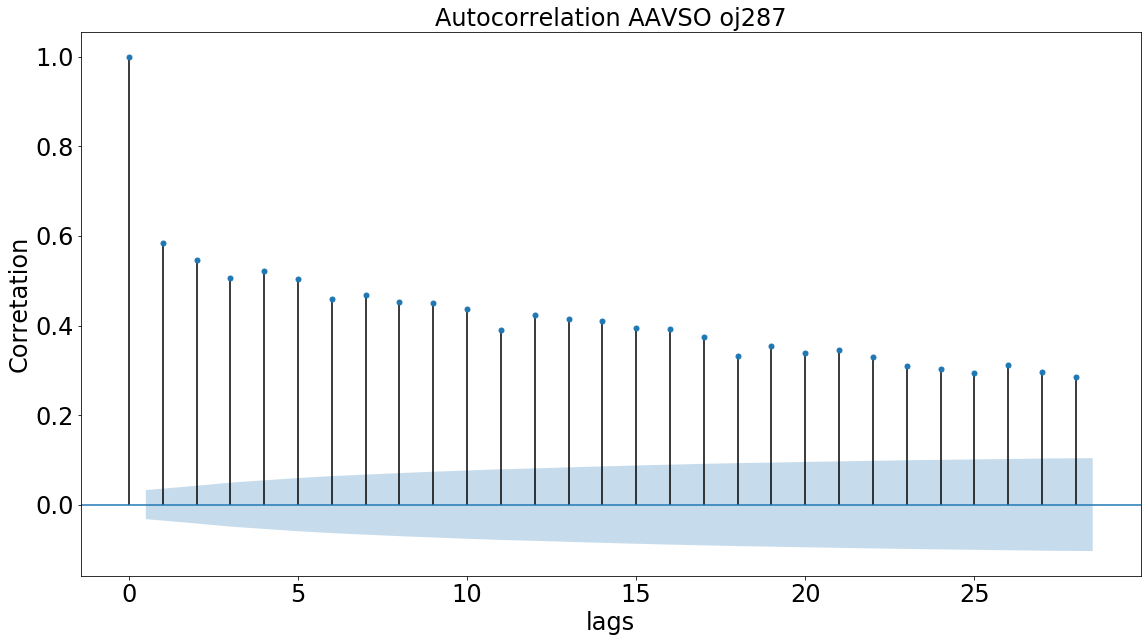

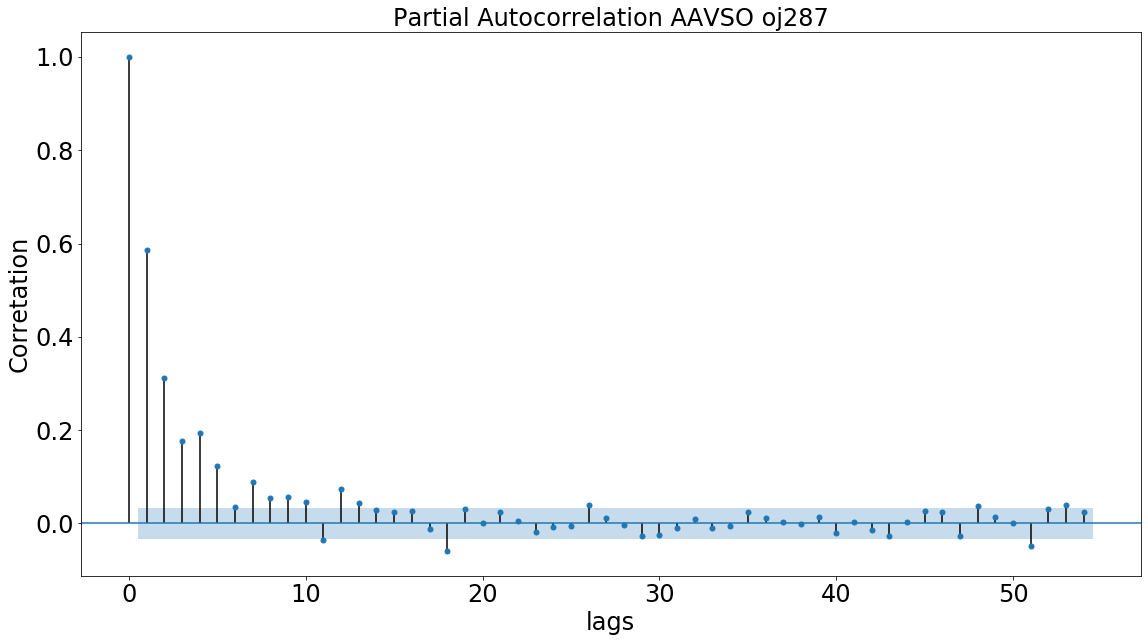

In [22]:
, usecols=(0,1,2)from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#54812-54473
#339 días
rcParams['figure.figsize'] = 19, 10

plot_acf(ts, lags=28, fft=True, alpha=.05)
plt.title("Autocorrelation"+instr+obj, fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xlabel("lags", fontsize=24)
plt.ylabel("Corretation", fontsize=24)

plot_pacf(ts, lags=54, alpha=.05)
plt.title("Partial Autocorrelation"+instr+obj, fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xlabel("lags", fontsize=24)
plt.ylabel("Corretation", fontsize=24)
#plt.xlim=(50, 550)
#plt.savefig("images/"+obj+"_"+freq+"_correlation.png", format="png", dpi=300)

In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determinar estadísticas móviles
    rolmean = timeseries.rolling(window=12,center=True).mean()
    rolstd = timeseries.rolling(window=12,center=True).std()

    # Graficar estadísticas móviles#luz="radio"
    orig = plt.plot(timeseries, color='blue',label='Serie de tiempo')
    mean = plt.plot(rolmean, color='red', label='Media móvil')
    std = plt.plot(rolstd, color='black', label = 'Desv. est. móvil')
    plt.legend(loc='best', fontsize=24)
    

    rcParams['figure.figsize'] = 19, 10  
    plt.title('Serie de tiempo con media y desv. est. móviles', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=24)
    plt.show(block=False)
    
    # Realizar prueba Dicket-Fuller
    dftest = adfuller(timeseries, autolag='AIC')
    tstat = dftest[0]; pvalue = dftest[1]; cvalues = dftest[4]
    print('Resultado de la prueba Dickey-Fuller')
    print("------------------")
    print("Estadística de prueba\t",tstat)
    print("p-value\t\t\t",pvalue)
    print("------------------")
    print("Valores críticos (la estadística de prueba debe ser MENOR)")
    for clevel in [10,5,1]:
        conf = 100-clevel
        cval = cvalues['%i%%' % clevel]
        if tstat < cval:
            comp = ">"
            verdict = "PASA"
        else:
            comp = "<"
            verdict = "FALLA"        
        print("Confianza %i%%\t\t%f %s %f ... %s" % (conf, cval, comp, tstat, verdict))   

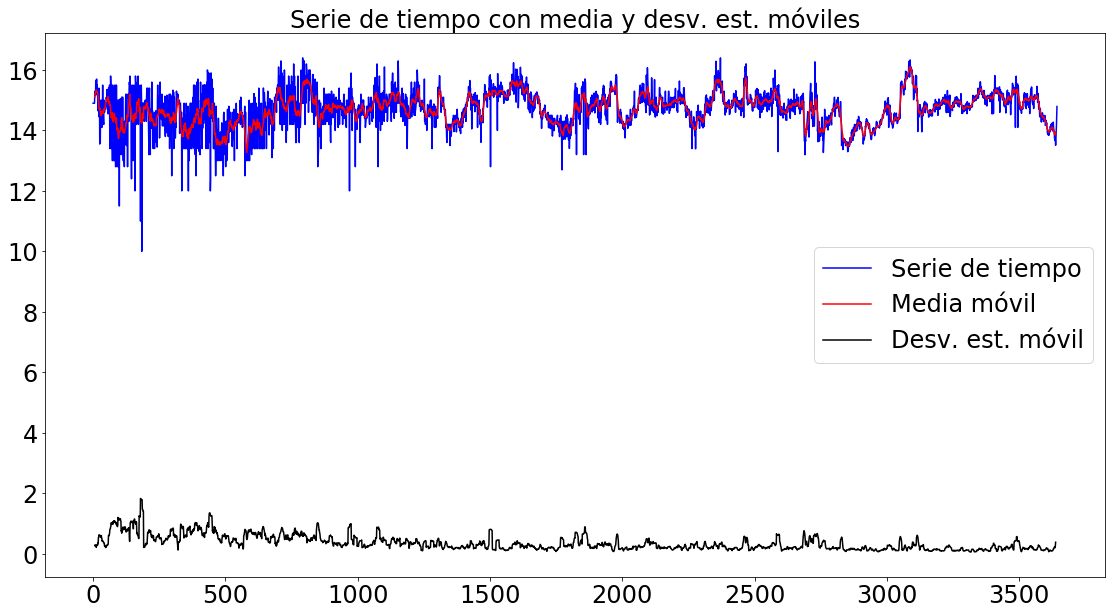

Resultado de la prueba Dickey-Fuller
------------------
Estadística de prueba	 -6.349092868768733
p-value			 2.6379584421286006e-08
------------------
Valores críticos (la estadística de prueba debe ser MENOR)
Confianza 90%		-2.567195 > -6.349093 ... PASA
Confianza 95%		-2.862338 > -6.349093 ... PASA
Confianza 99%		-3.432155 > -6.349093 ... PASA


In [15]:
test_stationarity(ts)

## Valores NaN

https://github.com/ResidentMario/missingno

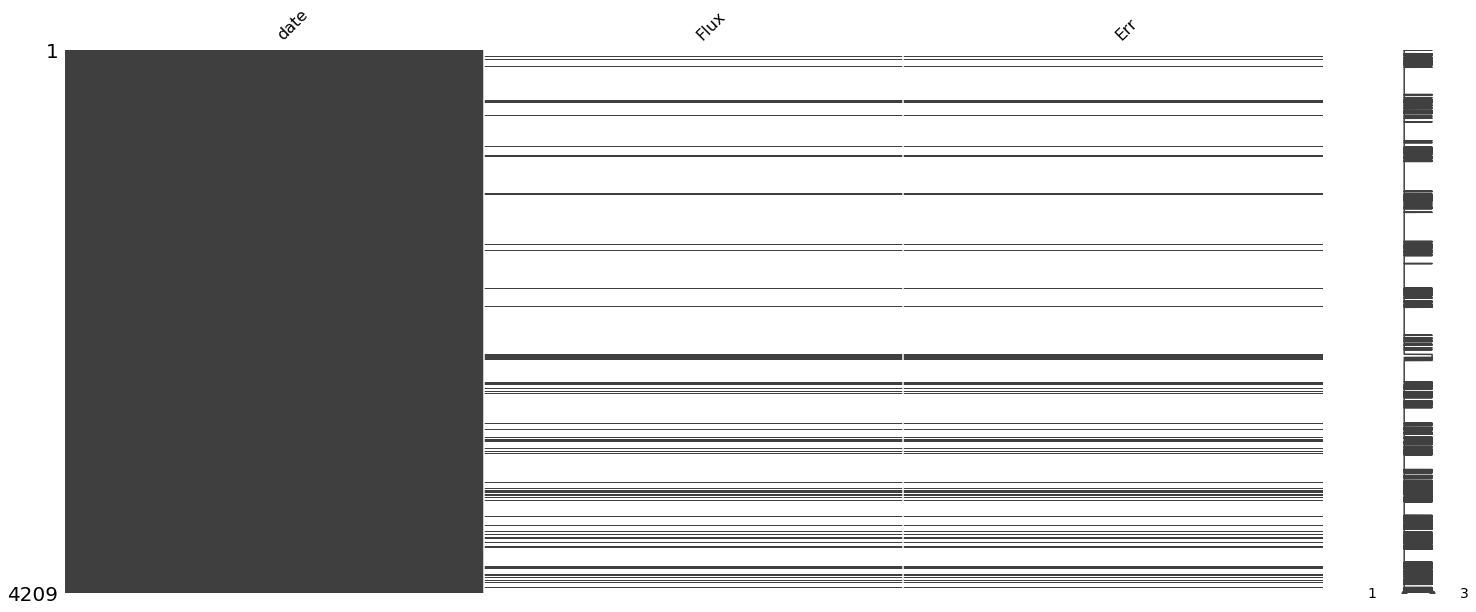

In [55]:
import missingno as msno
msno.matrix(data)

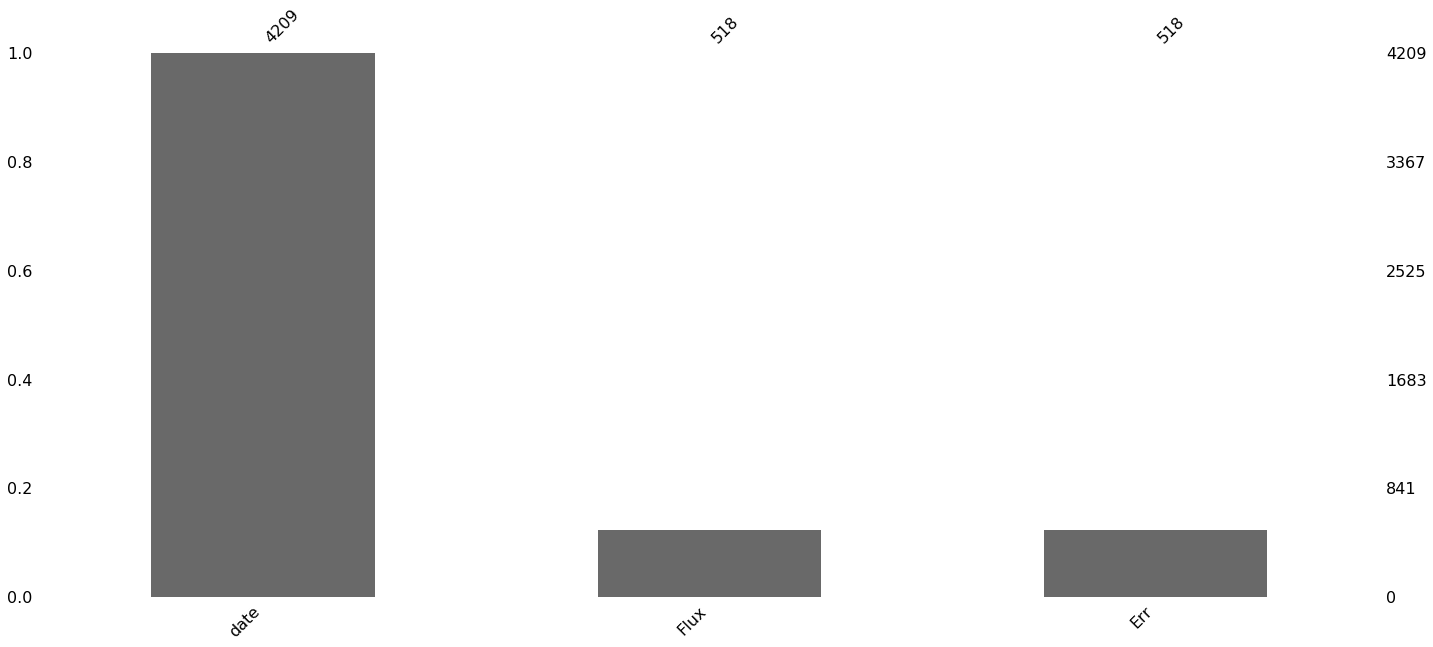

In [56]:
msno.bar(data)

In [ ]:
msno.heatmap(data) 

In [ ]:
msno.dendrogram(data)

In [ ]:
legenda_mediana="Median="+str(mediana[1])
legenda_media="Mean="+str(media[1])
legenda_max="Max="+str(maximo[1])
legenda_min="Min="+str(minimo[1])
legenda_desv="Stan. Desv. ="+str(desv[1])
bines=data.shape[0]//2

#fig, ax = plt.subplots()
#plt.tick_params(axis='both', which='major', labelsize=24)

data.hist(bins=bines, column=['Flux'], ax=ax)
ax.set_title("Histogram"+instr+obj, fontsize=24)
ax.set_ylabel('Absolute Frecuency', fontsize=24)
ax.set_xlabel('Flux Density (Jy)', fontsize=24)


ax.text(0.8, 19.5, legenda_mediana, fontsize=24)
ax.text(0.8, 19, legenda_media, fontsize=24)
ax.text(0.8, 18.5, legenda_max, fontsize=24)
ax.text(0.8, 18, legenda_min, fontsize=24)
ax.text(0.8, 17.5, legenda_desv, fontsize=24)

#fig.savefig(path+obj+"_hist.png")